# K-Nearest Neighbor Lab





In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

## 1. (40%) Correctly implement the k-nearest neighbor (KNN) algorithm and the KNN regression algorithm

### Code requirements
- Use Euclidean distance to decide closest neighbors. 
- Include optional distance weighting for both algorithms


In [180]:
class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type
        self.data = None
        self.labels = None

    def fit(self, data, labels):
        self.data = data
        self.labels = labels

        return self
    
    def predict(self, data, num_k):

        k = num_k

        predictions = []

        for i in range(len(data)):
          curr_data = data[i]
          distances = np.linalg.norm(self.data - curr_data, axis=1)

          # Get indices of nearest neighbors and save labels
          nearest_neighbor_ids = distances.argsort()[:k]
          nearest_labels = [self.labels[id] for id in nearest_neighbor_ids]

          # Sort alphabetically
          nearest_labels = sorted(nearest_labels)

          # Make prediction based on most common labels
          c = Counter(nearest_labels)
          c.most_common(1)
          prediction = c.most_common(1)[0][0]

          if self.weight_type == 'inverse_distance':
            # Get weight values
            closest_weights = [distances[id] for id in nearest_neighbor_ids]

            # Get all unique values from 
            unique_labels = np.unique(nearest_labels)
            inversed_weights = [0.0 for i in range(len(unique_labels))]

            for i, label in enumerate(unique_labels):
              curr_sum = 0
              for index, value in enumerate(nearest_labels):
                if value == label:
                  curr_sum += 1 / closest_weights[index]
              
              inversed_weights[i] = curr_sum

            
            max_inverse_distance = np.argmax(inversed_weights)
            predictions.append(unique_labels[max_inverse_distance])

          else:
            # Append prediction for no-weighting
            predictions.append(prediction)

        return predictions

    # Regression variation of 
    def predict_regression(self, data, num_k):

        k = num_k

        predictions = []

        for i in range(len(data)):
          curr_data = data[i]
          distances = np.linalg.norm(self.data - curr_data, axis=1)

          # Get indices of nearest neighbors and save labels
          nearest_neighbor_ids = distances.argsort()[:k]
          nearest_labels = [self.labels[id] for id in nearest_neighbor_ids]
          prediction = 0

          if self.weight_type == 'inverse_distance':
            # Get weight values
            closest_weights = [distances[id] for id in nearest_neighbor_ids]

            numerator = 0
            denominator = 0
            for i in range(len(closest_weights)):
              distance = closest_weights[i]
              regression_label = nearest_labels[i]

              numerator += (1/(distance**2)) * regression_label
              denominator += 1 /(distance**2)

            regression = numerator / denominator

            predictions.append(regression)

          else:
            # Regression formula for no-weighting
            sum = np.sum(nearest_labels)

            regression = sum / k

            # Append prediction for no-weighting
            predictions.append(regression)

        return predictions

    def predict_distance_metric(self, data, num_k):
      k = num_k
      predictions = []

      for i in range(len(data)):
        # Get distances using distance metric
        distances = self.distance_metric(data[i])

        nearest_neighbor_ids = distances.argsort()[:k]
        nearest_labels = [self.labels[id] for id in nearest_neighbor_ids]

        # Sort alphabetically
        nearest_labels = sorted(nearest_labels)

        # Make prediction based on most common labels
        c = Counter(nearest_labels)
        c.most_common(1)
        prediction = c.most_common(1)[0][0]

        if self.weight_type == 'inverse_distance':
          # Get weight values
          closest_weights = [distances[id] for id in nearest_neighbor_ids]

          # Get all unique values from 
          unique_labels = np.unique(nearest_labels)
          inversed_weights = [0.0 for i in range(len(unique_labels))]

          for i, label in enumerate(unique_labels):
            curr_sum = 0
            for index, value in enumerate(nearest_labels):
              if value == label:
                curr_sum += 1 / closest_weights[index]
            
            inversed_weights[i] = curr_sum

          max_inverse_distance = np.argmax(inversed_weights)

          # Append prediction using inverse weighting
          predictions.append(unique_labels[max_inverse_distance])

        else:
          # Append prediction for no-weighting
          predictions.append(prediction)

      return predictions
    
    def distance_metric(self, row_to_predict):
      distances = []

      # Iterate through every row in training data
      for i, row in enumerate(self.data):

        test_values = []
        train_values = []

        # Iterate through every column in train/test data
        for j, col in enumerate(self.data[i]):
          data_type = self.columntype[j]

          # Check if values are equal for nomial data, if so, replace values with 0, else 1
          if data_type == "nominal":
            if row_to_predict[j] == self.data[i][j]:
              test_values.append(0.0)
              train_values.append(0.0)
            else: # Values are different, distance will = 1 when subtracted
              test_values.append(0.0)
              train_values.append(1.0)
          # Keep values as is for continuous data
          else:
            test_values.append(row_to_predict[j])
            train_values.append(self.data[i][j])
        
        # Subtract values of both rows, get distance with linalg.norm
        subtracted = np.array(train_values) - np.array(test_values)
        distance = np.linalg.norm(subtracted)

        # Get distance for current row and test data
        distances.append(distance)

      return np.array(distances)

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        total_values = 0
        total_correct = 0

        for i in range(len(y)):
          predicted = X[i]
          actual = y[i]

          if predicted == actual:
            total_correct += 1
          total_values += 1

        return total_correct/total_values
    
    def MSE(self, X, y):
      means_squared = 0
      for i in range(len(y)):
        means_squared += (y[i] - X[i])**2
      return means_squared / len(y)

## 1.1 Debug and Evaluation

Debug and Evaluate your model using the parameters below:

- Use distance weighting
- KNN = 3 (three nearest neighbors)
- Don’t normalize the data
- Use Euclidean Distance

---

### 1.1.1 Debug

- Use this [glass training set](https://byu.instructure.com/courses/14142/files?preview=4660939) and this [glass test set](https://byu.instructure.com/courses/14142/files?preview=4660941)
- Use distance weighting
- KNN = 3 (three nearest neighbors)
- Don’t normalize the data
- Use Euclidean Distance

Expected Results:
- Not using inverse weighted distancing = roughly [68.29%]
- Link to [glass no_inverse debug solution](https://byu.instructure.com/courses/14142/files?preview=4660947)

- Using inverse weighted distancing = roughly [74.39%]
- Link to [glass inverse debug solution](https://byu.instructure.com/courses/14142/files?preview=4660954)


In [3]:
# Load glass data
# Load debug training data 
raw_data = loadarff('glass_train.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('Type',axis=1)
labels = df['Type']
labels = labels.str.decode("utf-8")
1
X_train = values.values
y_train = labels.values


# Train on training set
model = KNNClassifier(weight_type="none")
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('glass_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('Type',axis=1)
labels = df['Type']
labels = labels.str.decode("utf-8")

X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel accuracy on Glass Dataset No Inverse")
print(model.score(model.predict(X_test, 3), y_test))


# Predict model using inverse weights
model = KNNClassifier()
model.fit(X_train,y_train)

print("\nModel accuracy on Glass Dataset With Inverse")
print(model.score(model.predict(X_test, 3), y_test))


Model accuracy on Glass Dataset No Inverse
0.6829268292682927

Model accuracy on Glass Dataset With Inverse
0.7073170731707317


### 1.1.2 Evaluate

We will evaluate your model based on its performance on the [diabetes](https://archive.ics.uci.edu/ml/datasets/Diabetes) problem.
- Use this [diabetes training set](https://byu.instructure.com/courses/14142/files?preview=4660977) and this [diabetes test set](https://byu.instructure.com/courses/14142/files?preview=4660978)

In [4]:
# Load diabetes data
# Load debug training data 
raw_data = loadarff('diabetes_train.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")
1
X_train = values.values
y_train = labels.values


# Train on training set
model = KNNClassifier(weight_type="none")
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('diabetes_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")

X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel accuracy on Diabetes data No Inverse")
print(model.score(model.predict(X_test, 3), y_test))

# Predict model using inverse weights
model = KNNClassifier()
model.fit(X_train,y_train)

print("\nModel accuracy on Diabetes data With Inverse: ")
print(model.score(model.predict(X_test, 3), y_test))


Model accuracy on Diabetes data No Inverse
0.8411458333333334

Model accuracy on Diabetes data With Inverse: 
0.8203125


## 2. (10%) Use the k-nearest neighbor algorithm (without distance weighting) for the [magic telescope](http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope) problem

- Use this [magic telescope training set](https://byu.instructure.com/courses/14142/files?preview=4660988) and this [magic telescope test set](https://byu.instructure.com/courses/14142/files?preview=4660989) 

### 2.1
- Try it with k=3 and without normalization


In [74]:
# Load magic telescope data
# Load diabetes data
# Load debug training data 
raw_data = loadarff('magic_telescope_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")


X_train = values.values
y_train = labels.values


# Train on training set
model = KNNClassifier(weight_type="none")
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('magic_telescope_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")

X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel accuracy on Magic Telescope No Normalization, no Inverse Weighting")
print(model.score(model.predict(X_test, 3), y_test))


Model accuracy on Magic Telescope No Normalization, no Inverse Weighting
0.8082808280828083


### 2.2
- Try it with k=3 and with normalization (input features normalized between 0 and 1). Use the normalization formula (x-xmin)/(xmax-xmin)

In [5]:
raw_data = loadarff('magic_telescope_train.arff')
df = pd.DataFrame(raw_data[0])
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,22.7815,14.9526,2.4362,0.4982,0.2509,-14.2836,-9.3635,13.0939,3.0779,141.5620,b'g'
1,40.6756,15.5940,2.7447,0.2772,0.1449,19.6226,9.0297,7.4157,15.4260,193.2340,b'g'
2,12.8427,11.3821,2.1255,0.7191,0.4232,-14.9637,8.5891,6.9418,82.4198,183.9790,b'g'
3,77.0262,32.2880,3.3502,0.3152,0.1868,-28.6712,-35.9464,-31.4001,0.8940,357.0440,b'g'
4,27.5146,11.2114,2.6637,0.4643,0.2687,42.4467,33.0422,-6.3980,50.3004,239.8878,b'h'


In [75]:
# Train/Predict with normalization
# Load magic telescope data
raw_data = loadarff('magic_telescope_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('class',axis=1)

labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize training data
values = (values - values.min())/(values.max() - values.min())

X_train = values.values
y_train = labels.values


# Train on training set
model = KNNClassifier(weight_type="none")
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('magic_telescope_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize test data
values = (values - values.min())/(values.max() - values.min())

# Turn to numpy arrays
X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel accuracy on Magic Telescope With Normalization, no Inverse Weighting")
print(model.score(model.predict(X_test, 3), y_test))


Model accuracy on Magic Telescope With Normalization, no Inverse Weighting
0.8157815781578158


On the magic telescope dataset, there was a small but noticable increase in prediction accuracy when using the normalized dataset. Without normalized data, the accuracy was 80.8% but with the normalized data, accuracy was 81.6%, an increase of 0.8%. Even though that is a small increase, in a classification task, any gain is valuable. 

Normalizing data is valuable especially when using a dataset with a wider variety of numeric features. In the magic telescope data, the first column, fLength features values of various lengths. Even in just the first few rows, values range from the 20's to the 70's, creating a big disparity in terms of distance between data points. Other columns such as the fConc1 are values between 0 and 1, which have a very small range of distances between points. When we calculate distance between a test point and the training data, if the data is not normalized, then the model will tend to rely on the data features with the largest absolute values since those influence the total distances the most. If the classification does correlate well with those values, then the prediction accuracy is usually passable, however, in cases where features with large absolute values does not work well to predict the output class, unnormalized data will have inconsistent results in prediction. By scaling the data with normalization, the general relationship between the points and classes is maintained, but the especially large and small outlier values will not affect the predictions as heavily since they are all contained within the same 0 to 1 range. 

This effect is seen in our magic telescope dataset, as we did have the aforementioned increase in accuracy when using the normalized dataset.

### 2.3

- Using your normalized data, create one graph with classification accuracy on the test set over k values. 
    - Use odd values of k from 1 to 15.
- As a rough sanity check, typical knn accuracies for the magic telescope data set are 75-85%

In [76]:
# Train/Predict with normalization using k=1,3,...,15
# Load magic telescope data
raw_data = loadarff('magic_telescope_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('class',axis=1)

labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize training data
values = (values - values.min())/(values.max() - values.min())

X_train = values.values
y_train = labels.values


# Train on training set
model = KNNClassifier(weight_type="none")
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('magic_telescope_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize test data
values = (values - values.min())/(values.max() - values.min())

X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel accuracy on Magic Telescope With Normalization, no Inverse Weighting for k=1,3..,15")

# Graph classification accuracy over k
for k in range (1,17, 2):
  print("K = ", k)
  print(model.score(model.predict(X_test, k), y_test))


Model accuracy on Magic Telescope With Normalization, no Inverse Weighting for k=1,3..,15
K =  1
0.7874287428742874
K =  3
0.8157815781578158
K =  5
0.8271827182718272
K =  7
0.8294329432943295
K =  9
0.8282328232823283
K =  11
0.8294329432943295
K =  13
0.8297329732973298
K =  15
0.8304830483048304


# For the rest of the experiments use only normalized data

## 3. (10%) Use the regression variation of your algorithm (without distance weighting) for the [housing price prediction](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) problem.

- Use this [housing training set](https://byu.instructure.com/courses/14142/files?preview=4660994) and this [housing test set](https://byu.instructure.com/courses/14142/files?preview=4660995).
- Use Mean Square Error (MSE) on the test set as your accuracy metric for this case.
    - Do not normalize regression output values
- Graph MSE on the test set with odd values of k from 1 to 15



Model regression accuracy on Housing Data With Normalization, no Inverse Weighting for k=1,3...15
K =  1
23.580980392156874
K =  3
14.215446623093682
K =  5
16.31825882352942
K =  7
20.028679471788713
K =  9
20.14123456790124
K =  11
21.274496840058347
K =  13
22.408194686158495
K =  15
22.584964705882353


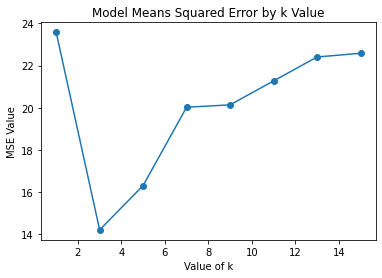

In [80]:
# Load housing price prediction data
raw_data = loadarff('housing_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('MEDV',axis=1)
labels = df['MEDV']

values['CHAS'] = values['CHAS'].str.decode('utf-8')
values['CHAS'] = pd.to_numeric(values['CHAS'],downcast="float")

for column in values:
  if values[column].dtype == "float64":
    values[column] = (values[column] - values[column].min()) / (values[column].max() - values[column].min())

# Normalize training data
values = (values - values.min())/(values.max() - values.min())

X_train = values.values
y_train = labels.values

# Train on training set
model = KNNClassifier(weight_type="none")
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('housing_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('MEDV',axis=1)
labels = df['MEDV']

values['CHAS'] = values['CHAS'].str.decode('utf-8')
values['CHAS'] = pd.to_numeric(values['CHAS'],downcast="float")

for column in values:
  if values[column].dtype == "float64":
    values[column] = (values[column] - values[column].min()) / (values[column].max() - values[column].min())

# Normalize test data
values = (values - values.min())/(values.max() - values.min())

# Turn to numpy arrays
X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel regression accuracy on Housing Data With Normalization, no Inverse Weighting for k=1,3...15")
# Train/Predict using k=1,3,...,15
k_vals = []
MSE_vals = []
for k in range (1,17, 2):
  k_vals.append(k)
  print("K = ", k)
  curr_MSE = model.MSE(model.predict_regression(X_test, k), y_test)
  print(curr_MSE)
  MSE_vals.append(curr_MSE)


# Graph MSE over k
plt.plot(k_vals, MSE_vals, marker="o")
plt.xlabel("Value of k")
plt.ylabel("MSE Value")
plt.title("Model Means Squared Error by k Value")
plt.show()

## 4. (15%) Repeat your experiments for magic telescope and housing using distance-weighted (inverse of distance squared) voting and discuss your results.


## 4.1 Magic Telescope Dataset

In [82]:
# Train/Predict magic telescope using distance-weighted voting
# Load magic telescope data
raw_data = loadarff('magic_telescope_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('class',axis=1)

labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize training data
values = (values - values.min())/(values.max() - values.min())

X_train = values.values
y_train = labels.values


# Train on training set
model = KNNClassifier()
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('magic_telescope_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize test data
values = (values - values.min())/(values.max() - values.min())

X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel accuracy on Magic Telescope With Normalization, with Inverse Weighting for k=1,3..,15")

# Graph classification accuracy over k
for k in range (1,17, 2):
  print("K = ", k)
  print(model.score(model.predict(X_test, k), y_test))


Model accuracy on Magic Telescope With Normalization, with Inverse Weighting for k=1,3..,15
K =  1
0.7874287428742874
K =  3
0.8156315631563157
K =  5
0.8271827182718272
K =  7
0.8271827182718272
K =  9
0.8256825682568257
K =  11
0.8249324932493249
K =  13
0.8229822982298229
K =  15
0.8213321332133213


## 4.2 Housing Dataset


Model regression accuracy on Housing Data With Normalization, with Inverse Weighting for k=1,3...15
K =  1
23.58098039215687
K =  3
12.310558867751292
K =  5
11.179088494440384
K =  7
11.07389265789775
K =  9
11.736722469473246
K =  11
12.169079321844457
K =  13
12.598757816257994
K =  15
12.46086417012215


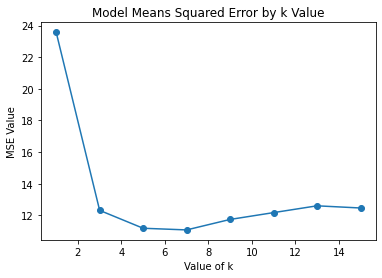

In [91]:
# Train/Predict housing using distance-weighted voting
# Load housing price prediction data
raw_data = loadarff('housing_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('MEDV',axis=1)
labels = df['MEDV']

values['CHAS'] = values['CHAS'].str.decode('utf-8')
values['CHAS'] = pd.to_numeric(values['CHAS'],downcast="float")

for column in values:
  if values[column].dtype == "float64":
    values[column] = (values[column] - values[column].min()) / (values[column].max() - values[column].min())

# Normalize training data
values = (values - values.min())/(values.max() - values.min())

X_train = values.values
y_train = labels.values

# Train on training set
model = KNNClassifier()
model.fit(X_train,y_train)

# Load test set
raw_data = loadarff('housing_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('MEDV',axis=1)
labels = df['MEDV']

values['CHAS'] = values['CHAS'].str.decode('utf-8')
values['CHAS'] = pd.to_numeric(values['CHAS'],downcast="float")

for column in values:
  if values[column].dtype == "float64":
    values[column] = (values[column] - values[column].min()) / (values[column].max() - values[column].min())

# Normalize test data
values = (values - values.min())/(values.max() - values.min())

# Turn to numpy arrays
X_test = values.values
y_test = labels.values

# Predict on test set
print("\nModel regression accuracy on Housing Data With Normalization, with Inverse Weighting for k=1,3...15")
# Train/Predict using k=1,3,...,15
k_vals = []
MSE_vals = []
for k in range (1,17, 2):
  k_vals.append(k)
  print("K = ", k)
  curr_MSE = model.MSE(model.predict_regression(X_test, k), y_test)
  print(curr_MSE)
  MSE_vals.append(curr_MSE)


# Graph MSE over k
plt.plot(k_vals, MSE_vals, marker="o")
plt.xlabel("Value of k")
plt.ylabel("MSE Value")
plt.title("Model Means Squared Error by k Value")
plt.show()

It is clear from just the comparison to previous tests that taking the steps of normalizing the data and running the distance weighting in our calculations improves the performance of both the Classification and the Regression of the model.

With the classifier, the accuracy increase was quite significant. In part 2, when I ran the magic telescope dataset with the normalization but no distance weighting, the best accuracy I got (with k = 3) was 81.6%. In this part, I ran the tests with the odd k values again to get a comparison, and the best results (both k = 5 and k = 7) got as high as 82.7%, a 1.1% increase over the tests in part 2. A 1% gain still sounds small, but that is a significant jump, especially when the test data is multiple hundreds of examples. 1% gain indicates that multiple examples that were previously classified incorrectly were improved. I think the increase in the k value was the most significant factor in the improved performance, but the distance weighting still helped to perform a similar function to the data normalization and helping to appropriately reward closer distances, which becomes more obvious when more k values are included in the calculations. 

I think the affects of the inverse distance weighting with the normalization is more obvious in the regression function on the Housing data. In part 3, when I ran the regression, there was an initial high MSE for k=1 then it dropped down to about 14 and steadily increased as k increased. Logically thinking, this result makes sense; when there is only 1 k, the outcome is unlikely to be very accurate because there is no other neighbors to make a comparison with. As k gets very large, without distance weighting the MSE will start to scale regardless since more values which are progressively further away from the test point are added in to the calculations and their values are weighing heavier on the result since they are not scaled. That affect is nullified by implementing the inverse weighting for the regression prediction. The initial high MSE when k=1 is still there as expected, but after the drop off at k=3 the MSE stays relatively low. This makes sense, since the inverse weighting insures that even if more values are considered, they are being weighted appropriately according to their relative location and distance from the new point. 

In both cases of regression and classification there was a performance improvement by using data normalization and distance weighting together, but the improvement was most easily seen in the output of the regression model. The graphs help to visualize the improvement as k continues to increase for the Regressor.

## 5. (10%) Use the k-nearest neighbor algorithm to solve the [credit-approval](https://archive.ics.uci.edu/ml/datasets/Credit+Approval) (credit-a) problem.

- Use this [credit approval dataset](https://byu.instructure.com/courses/14142/files?preview=4660998)
    - Use a 70/30 split of the data for the training/test set
- Note that this set has both continuous and nominal attributes, together with don’t know values. 
- Implement and justify a distance metric which supports continuous, nominal, and don’t know attribute values
    - You need to handle don't knows with the distance metric, not by imputing a value.
    - More information on distance metrics can be found [here](https://www.jair.org/index.php/jair/article/view/10182/24168).
- Use your own choice for k.
- As a rough sanity check, typical knn accuracies for the credit data set are 70-80%.


In [182]:
# Load dataset and split into train/test sets
# Train/Predict with normalization

raw_data = loadarff('credit_approval.arff')
df = pd.DataFrame(raw_data[0])
df_train, df_test = train_test_split(df, test_size=0.3)

# Reset indicies to fix look up
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Get column types for each column
column_types = []

# Decode byte strings to normal strings and normalize test data
for column in df_train:
  # Decode byte string for non-numeric data
  if df_train[column].dtype != "float64":
    column_types.append("nominal")
    df_train[column] = df_train[column].str.decode('utf-8')
  else:
    column_types.append("continuous")
    df_train[column] = (df_train[column] - df_train[column].min()) / (df_train[column].max() - df_train[column].min())

# Separate training data to values and labels
X_train = df_train.drop('class', axis=1).values
y_train = df_train['class']

# Initialize model
model = KNNClassifier(columntype=column_types)

# "Fit" model with training data
model.fit(X_train, y_train)


# Prepare test data for predicting
# Decode byte strings to normal strings and normalize test data
for column in df_test:
  # Decode byte string for non-numeric data
  if df_test[column].dtype != "float64":
    df_test[column] = df_test[column].str.decode('utf-8')
  else:
    df_test[column] = (df_test[column] - df_test[column].min()) / (df_test[column].max() - df_test[column].min())

# Separate training data to values and labels
X_test = df_test.drop('class', axis=1).values
y_test = df_test['class']


# Train/Predict credit-approval
k_val = 5
print("Model accuracy on Credit Approval Dataset with No Inverse Weighting and Normalization and k = ", k_val)
print(model.score(model.predict_distance_metric(X_test, 3), y_test))


Model accuracy on Credit Approval Dataset with No Inverse Weighting and Normalization and k =  5
0.8067632850241546


I used a distance metric that would look at normial data and continuous data separately. When a new point was looked at to be predicted, I would then take a row of the training data to compare and iterate over each value. Using the pre-prepared column of value types, I would check if the data was nominal or continuous. If the data was continous, I would keep those values exactly how they are. If the data was nominal, I would then check the if the two values are the same. If they were then I would replace the value in both data points with a 0 for both. If they were different, I would replace the value in the original data point with a 1 and a 0 in the new data point. By doing this, when I subtract the two data points before running the result thorugh np.linalg.norm(), the resulting distance for that dimension will be 1 since 1 - 0 = 1. For datapoints with matching values, the resulting distance in that feature dimension would be 0 (0-0=0). By doing this, there is just two possibilities for distance for norminal data values of either 0 or 1, and the total distance between the two points is easy to calcualte now using numpy since all of the data is translated into numeric values. 

This approach works fine because the new nominal distance values do not exceed the possible values for the normalized continous data which is all between 0 and 1. It does make the distance a bit more heavily affected by the nominal datapoints, since having 0 and 1's in those columns weighs more heavily when most of the data is just float values betwen 0 and 1. I worried that this might affect the prediction output negatively, but as my testing showed, the prediction accuracy remained within the expected ranges. It is a much simpler approach than trying to weight the applied distance based on the total number of classes in each column, which will do a better job of giving a more nuanced value of what the new weight should be instead of just a blanket 1 or 0, but my results seemed well enough that I did not feel I needed to go that far. 

The other plus to this method is that it allows for easy treatment of NaN and N/A values. In the nominal data, if a missing value is encountered, its easy to treat it like its own category and assign it the distance of a non-matching value. It requires no extra effort so it reduced the need to make guesses as to the possible value may be. 

There are many approaches as the extra reading indicated. I definitely think a more nuanced approach to the nominal data weighting would work better depending on the complexity and size of the dataset. However, in this case, the results showed that even just a simple treatment of the catagorical data values can still produce satisfactory results.

## 6. (15%) Use the scikit's KNN Classifier on magic telescope and KNN Regressor on housing and compare your results.

- Try out different hyperparameters to see how well you can do. 


In [191]:
# I exported the scoring code to a function, so I can just create multiple instances of the classifier with different parameters 
# and run them and compare outputs without making the code below cluttered.
def score(X, y):
  total_values = 0
  total_correct = 0

  for i in range(len(y_test)):
    predicted = X[i]
    actual = y[i]

    if predicted == actual:
      total_correct += 1
    total_values += 1
  return total_correct / total_values

### Testing KNN Classifier on Magic Telescope

In [200]:
# Train/Predict magic telescope using scikit's KNN
# Load magic telescope data
raw_data = loadarff('magic_telescope_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('class',axis=1)

labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize training data
values = (values - values.min())/(values.max() - values.min())

X_train = values.values
y_train = labels.values

# Load test set
raw_data = loadarff('magic_telescope_test.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('class',axis=1)
labels = df['class']
labels = labels.str.decode("utf-8")

# Normalize test data
values = (values - values.min())/(values.max() - values.min())

# Turn to numpy arrays
X_test = values.values
y_test = labels.values

# Use 3 as default k value for running parameter tests
k_vals = 3

# First, try a test with varying k-neighbor values
for k in range(1, 17, 2):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)

  print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors".format(k))
  print(score(neigh.predict(X_test), y_test))

# Try changing some of the parameters

# Change weights parameter,
neigh = KNeighborsClassifier(n_neighbors=k_vals, weights='distance')
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, weights=distance".format(k_vals))
print(score(neigh.predict(X_test), y_test))

# Change algorithms
neigh = KNeighborsClassifier(n_neighbors=k_vals, algorithm="ball_tree")
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, algorithm=ball_tree".format(k_vals))
print(score(neigh.predict(X_test), y_test))

neigh = KNeighborsClassifier(n_neighbors=k_vals, algorithm="kd_tree")
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, algorithm=kd_tree".format(k_vals))
print(score(neigh.predict(X_test), y_test))

neigh = KNeighborsClassifier(n_neighbors=k_vals, algorithm="brute")
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, algorithm=brute".format(k_vals))
print(score(neigh.predict(X_test), y_test))

# Change p in Minkowski metric
neigh = KNeighborsClassifier(n_neighbors=k_vals, p=1) # Manhattan Distance
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, p=1".format(k_vals))
print(score(neigh.predict(X_test), y_test))

neigh = KNeighborsClassifier(n_neighbors=k_vals, p=3) # Minkowski
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, p=3".format(k_vals))
print(score(neigh.predict(X_test), y_test))

neigh = KNeighborsClassifier(n_neighbors=k_vals, p=5) # Minkowski
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, p=5".format(k_vals))
print(score(neigh.predict(X_test), y_test))


# Try combining some of the best performing attributes (p=1, weights="uniform", k=15, algorithm=auto)
neigh = KNeighborsClassifier(n_neighbors=15, p=1)
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Magic Telescope With Normalization, {} nearest neighbors, p=1, default other parameters".format(15))
print(score(neigh.predict(X_test), y_test))



Scikit learn model accuracy on Magic Telescope With Normalization, 1 nearest neighbors
0.7874287428742874

Scikit learn model accuracy on Magic Telescope With Normalization, 3 nearest neighbors
0.8157815781578158

Scikit learn model accuracy on Magic Telescope With Normalization, 5 nearest neighbors
0.8271827182718272

Scikit learn model accuracy on Magic Telescope With Normalization, 7 nearest neighbors
0.8294329432943295

Scikit learn model accuracy on Magic Telescope With Normalization, 9 nearest neighbors
0.8282328232823283

Scikit learn model accuracy on Magic Telescope With Normalization, 11 nearest neighbors
0.8294329432943295

Scikit learn model accuracy on Magic Telescope With Normalization, 13 nearest neighbors
0.8297329732973298

Scikit learn model accuracy on Magic Telescope With Normalization, 15 nearest neighbors
0.8304830483048304

Scikit learn model accuracy on Magic Telescope With Normalization, 3 nearest neighbors, weights=distance
0.8157815781578158

Scikit learn mo

In [7]:
# Train/Predict Housing using scikit's KNN Regression
# Load housing price prediction data
raw_data = loadarff('housing_train.arff')
df = pd.DataFrame(raw_data[0])

values = df.drop('MEDV',axis=1)
labels = df['MEDV']

values['CHAS'] = values['CHAS'].str.decode('utf-8')
values['CHAS'] = pd.to_numeric(values['CHAS'],downcast="float")

for column in values:
  if values[column].dtype == "float64":
    values[column] = (values[column] - values[column].min()) / (values[column].max() - values[column].min())

# Normalize training data
values = (values - values.min())/(values.max() - values.min())

X_train = values.values
y_train = labels.values

# Load test set
raw_data = loadarff('housing_test.arff')
df = pd.DataFrame(raw_data[0])
values = df.drop('MEDV',axis=1)
labels = df['MEDV']

values['CHAS'] = values['CHAS'].str.decode('utf-8')
values['CHAS'] = pd.to_numeric(values['CHAS'],downcast="float")

for column in values:
  if values[column].dtype == "float64":
    values[column] = (values[column] - values[column].min()) / (values[column].max() - values[column].min())

# Normalize test data
values = (values - values.min())/(values.max() - values.min())

# Turn to numpy arrays
X_test = values.values
y_test = labels.values

# Predict on test set
k_vals=3

# Train/Predict using k=1,3,...,15
for k in range (1,17, 2):
  print("\nSklearn KNN Regressor regression accuracy on Housing Data With Normalization for k = ", k)
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train, y_train)
  print(neigh.score(X_test, y_test))


# Try changing some of the parameters

# Change weights parameter,
neigh = KNeighborsRegressor(n_neighbors=k_vals, weights='distance')
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, weights=distance".format(k_vals))
print(neigh.score(X_test, y_test))

# Change algorithms
neigh = KNeighborsRegressor(n_neighbors=k_vals, algorithm="ball_tree")
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, algorithm=ball_tree".format(k_vals))
print(neigh.score(X_test, y_test))

neigh = KNeighborsRegressor(n_neighbors=k_vals, algorithm="kd_tree")
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, algorithm=kd_tree".format(k_vals))
print(neigh.score(X_test, y_test))

neigh = KNeighborsRegressor(n_neighbors=k_vals, algorithm="brute")
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, algorithm=brute".format(k_vals))
print(neigh.score(X_test, y_test))

# Change p in Minkowski metric
neigh = KNeighborsRegressor(n_neighbors=k_vals, p=1) # Manhattan Distance
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, p=1".format(k_vals))
print(neigh.score(X_test, y_test))

neigh = KNeighborsRegressor(n_neighbors=k_vals, p=3) # Minkowski
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, p=3".format(k_vals))
print(neigh.score(X_test, y_test))

neigh = KNeighborsRegressor(n_neighbors=k_vals, p=5) # Minkowski
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, p=5".format(k_vals))
print(neigh.score(X_test, y_test))


# Try combining some of the best performing attributes (p=3, weights="distance", k=3, weights=distance, )
neigh = KNeighborsRegressor(n_neighbors=3, p=3, weights='distance') 
neigh.fit(X_train, y_train)

print("\nScikit learn model accuracy on Housing Data With Normalization, {} nearest neighbors, p=3, and weights=distance".format(3))
print(neigh.score(X_test, y_test))


Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  1
0.6923150048765766

Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  3
0.81451663365283

Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  5
0.7870791076943359

Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  7
0.7386654819637777

Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  9
0.7371968613372147

Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  11
0.7224100377665461

Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  13
0.7076175308203643

Sklearn KNN Regressor regression accuracy on Housing Data With Normalization for k =  15
0.7053110328821024

Scikit learn model accuracy on Housing Data With Normalization, 3 nearest neighbors, weights=distance
0.8312297109129108

Scikit learn

*Report your comparison*
I was surprised at how well the Sklearn models (both the Classification and Regression) were able to do when I tinkered with the parameters a bit. On initial results, the output values were pretty similar to my model's.

Results for tests with k=3 and default parameters between Sklearn and my model.

My Model (Magic Telescope): 81.6%
My Model (Housing): MSE = 14.6
Sklearn (Magic Telescope): 81.6%
Sklearn (Housing): 81.5%

(The comparison between the Sklearn score and the MSE is not exactly the same, but uses a similar calculation as I read on the Sklearn documentation).

As it is shown, on the magic telescope with the same default settings and k-neighbors the two models actually performed the same accuracy wise. The comparison metric of MSE and score from sklearn are not the same, but the results are similar for the Regression models as well, though this would indicate my model performed a little better at this state.

From there, once I played with the parameters (the results of each tests is shown in the output in the cells above, along with the parameters changed each test) there were some clear ones that improved the performance. For the classification model, a higher k value and using Manhatten distance instead of Euclidean distance showed increases in accuracy when tested individually. For the regression model, Manhatten distance along with a smaller k value and setting the weights parameter to distance instead of uniform all showed small accuracy gains individually. What surprised me the most was that when I ran a test combining all of these "optimal" parameters, in both cases the final result was the highest scoring test of them all. 

Sklearn Classification Model on Magic Telescope (with optimal settings): 83.3%
Sklearn Regression Model on Housing Data (with optimal settings): 87.9%

Both of these results were better than any test I had run on the same datasets with any combination of settings on my model, so it is clear which is suprerior. 

The 2 most interesting takeaways from this experimentation are the following:

1) Different tasks call for different parameters. While the Classification and Regression models are similar yet different models inherantly, they still performed relatively well with just the same default settings. Yet, as I found out, the settings the provided the best performance on each tasks were actually quite difference, most notably with the number of k neighbors (15 for the telescope, 3 for the housing). It just goes to show the value of doing parameter search each time a new task is handled instead of defaulting to what is provided since you never know how each parameter affects the outcome.

2) Sometimes mixing and matching parameters does work. In previous labs, when I messed around with parameters, some of them helped to improve accuracy but often they did nothing or actually worsened the results. Occasionally I would have a positive result on a couple of things, but when those parameters are combined, the result is back to average or gets worse. This time however, I was so surprised to see that all of the best settings I found on individual tests actually worked together really well when combined. Each time, the parameters improved accuracy from the base test a little bit, but when combined, the accuracy improved by almost a sum of all the individual gains. It was suprising, and it is not often the case that that actually happens, but it was a pleasant surprise when working on this lab to see the combined improvement show up when the parameters were just put together.
